# Simple Linear Regression on Fuel Consumption Dataset

Data Source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

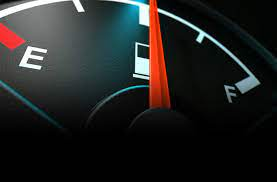

<p> In this notebook, we will be using scikit-learn to implement Linear Regression <br> we will be creating a model, training it and testing it </p>

## SETTING UP

In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
# reading data

fuel = pd.read_csv(r"C:\Users\Asif Sayyed\Desktop\Projects\Datasets\FuelConsumption.csv")

In [6]:
# viewing the dataset

display(fuel.head(),fuel.tail())

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


## DATA EXPLORATION

In [10]:
fuel.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [11]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


We have `13 columns` and `1067 rows` of data in the dataset <br>
5 columns are `categorical` and remaining 8 columns are `numerical` <br><br>
Since, we are using going to perform Linear Regression; we won't need all those categorical columns

## FEATURE SELECTION
- We will not be selecting any categorical columns <br>
- We won't be selecting Model Year as every model belongs to 2014 <br>
- In this dataset we have fuel consumption data in four seperate columns for City, Town, Comb and Comb MPG; so we will just be selecting `FUELCONSUMPTION_COMB` out of those
- We will be selecting rest of the numeric columns

In [14]:
# creating new dataset
s_fuel = fuel[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [17]:
display(s_fuel.head(),s_fuel.tail())

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260
1066,3.2,6,12.8,294


## PLOTTING THE FEATURES

### Plotting the histogram

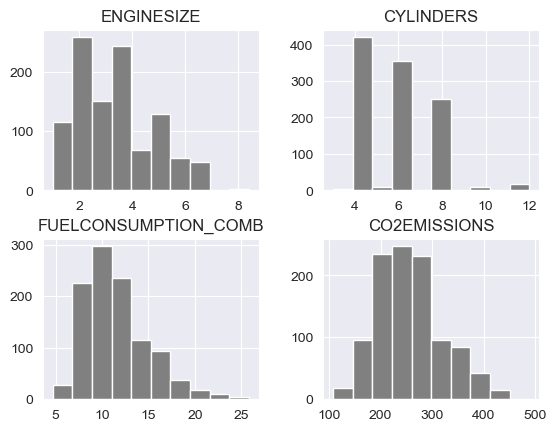

In [24]:
s_fuel.hist(color = 'grey')
plt.show()

**Inference:** 
All of the histograms are right skewed

### Plotting the relationship of each feature against Emission

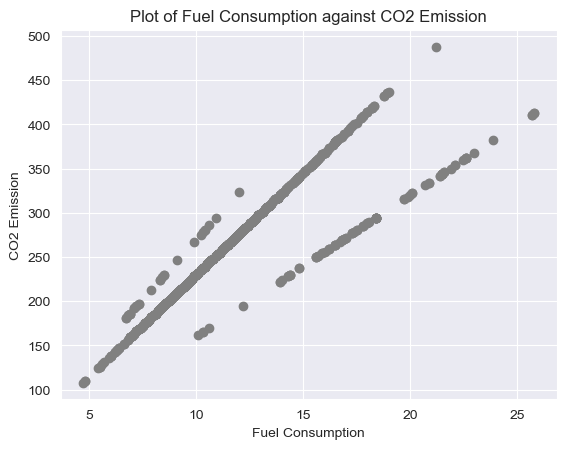

In [33]:
plt.scatter(s_fuel.FUELCONSUMPTION_COMB,s_fuel.CO2EMISSIONS, color = 'grey')
plt.title("Plot of Fuel Consumption against CO2 Emission")
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")
plt.show();

**Inference:** This relationship is linear as the fuel consumption increases the CO2 Emission also increases

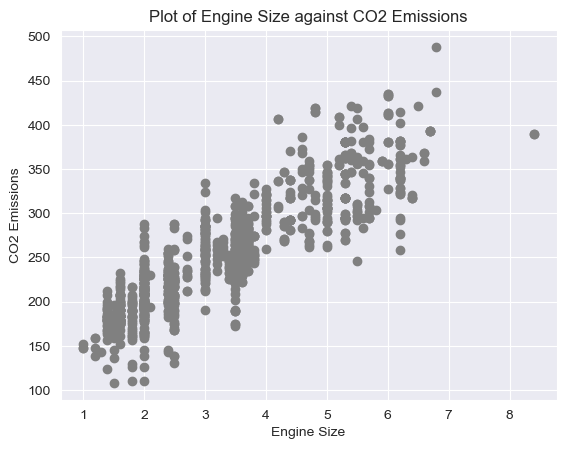

In [32]:
plt.scatter(s_fuel.ENGINESIZE,s_fuel.CO2EMISSIONS, color = 'grey')
plt.title("Plot of Engine Size against CO2 Emissions")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show();

**Inference:** This relationship is also fairy linear as the Engine size increases, the CO2 Emission also increases

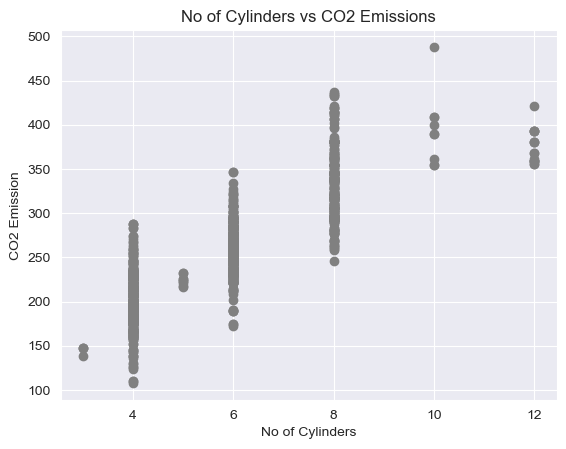

In [38]:
plt.scatter(s_fuel.CYLINDERS, s_fuel.CO2EMISSIONS, color = 'grey')
plt.title("No of Cylinders vs CO2 Emissions")
plt.xlabel("No of Cylinders")
plt.ylabel("CO2 Emission")
plt.show();

**Inference:** As the number of cylinders is a discreet value it is hard to make a scatter plot of it, but by the looks of it. it seems to show a linear relationship with CO2 Emission, hence if the number of cylinders increase, the CO2 Emission also increases

## CREATING TRAIN TEST DATASET

- We will be making `80%` of the entire dataset as training data
- the remaining `20%` of the dataset will be used for testing

In [41]:
mask = np.random.rand(len(fuel)) < 0.8
train = s_fuel[mask]
test = s_fuel[~mask]

## MODELLING

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

Training on `ENGINESIZE` vs `CO2EMISSIONS`

In [44]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

Fitting the dataset

In [45]:
lr.fit(train_x, train_y)

LinearRegression()

Printing the coefficients

In [47]:
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [[39.32687984]]
Intercept: [123.89197701]


### PLOTTING THE OUTPUTS

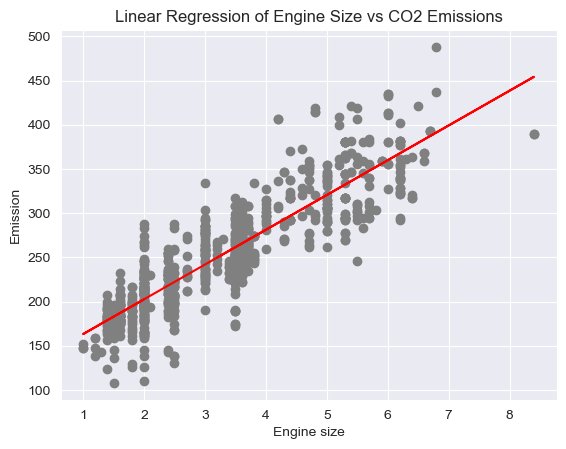

In [59]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='grey')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], '-r')
plt.title("Linear Regression of Engine Size vs CO2 Emissions")
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show();

## EVALUATION

In [65]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = lr.predict(test_x)

print("Mean absolute error:", np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE):",np.mean((test_y_ - test_y) ** 2))
print("R2-score:",r2_score(test_y , test_y_) )

Mean absolute error: 23.637510374249423
Residual sum of squares (MSE): 987.6033400180359
R2-score: 0.7237719012987148


<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyedasif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>